# 数据分析

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from datetime import datetime

## 载入数据

字段 | 分类 | 处理方式
---|---|---
ship_name | 杂讯 | 丢弃
ship_mobile | 类别特征 | 使用
order_id | 无关分析 | 丢弃
total_amount | 数值特征 | 过滤奇异值
final_amount | 重复信息 | 丢弃
pay_status | 类别特征 | {0, 1, 4, 5}
ship_status | 类别特征 | {0, 1}
is_delivery | 无识别度 | 丢弃
try_order | 无识别度 | 丢弃
erp_order_id | 数值特征 | {0, 1}
erp_status | 数值特征 | {'succ', 'normal'}
createtime | 数值特征 | 转换成日期
last_modified | 数值特征 | 转换成日期
payment | 类别特征 | {'wxpayjsapi', 'online', 'alipay', 'wxsmpay', '-1', 'deposit'}
shipping_id | 无识别度 | 丢弃
shipping | 类别特征 | {'冷链直供', '一米市集直送'}
member_id | 类别特征 | 使用
promotion_type | 类别特征 | {'normal', 'group', 'prepare', 'card'}
group_id | 类别特征 | 使用
groupOn_id | 类别特征 | 使用
is_leader | 数值特征 | {0, 1}
is_prepare | 无识别度 | 丢弃
group_num | 数值特征 | {0, 3}
status | 类别特征 | {'finish', 'dead', 'active', 'pendding'}
confirm_delivery | 类别特征 | {'Y', 'N'}
confirm | 无识别度 | 丢弃
ship_area | 类别特征 | 抽取区码
weight | 数值特征 | 使用
tostr | 无关分析 | 丢弃
itemnum | 数值特征 | [0, 30]
ip | 杂讯 | 丢弃
ship_addr | 重复信息 | 丢弃
ship_zip | 无关分析 | 丢弃
ship_tel | 重复信息 | 丢弃
ship_email | 无识别度 | 丢弃
ship_time | 类别特征 | 抽取时段，重新编码
cost_item | 数值特征 | 使用
is_tax | 数值特征 | {False, True}
tax_type | 类别特征 | {'false', 'company', 'personal'}
cost_tax | 无识别度 | 丢弃
is_protect | 无识别度 | 丢弃
cost_protect | 无识别度 | 丢弃
cost_payment | 无识别度 | 丢弃
currency | 无识别度 | 丢弃
cur_rate | 无识别度 | 丢弃
advance | 数值特征 | 0~993.4
score_u | 数值特征 | 0~2802.0
score_g | 数值特征 | 0~1149.0
discount | 数值特征 | 转成正数 (0~401.6)
pmt_goods | 数值特征 | 0~396.0
pmt_order | 数值特征 | 0~1899.0
payed | 杂讯 | 丢弃
disabled | 无识别度 | 丢弃
displayonsite | 数值特征 | {False, True}
mark_type | 无识别度 | 丢弃
cost_freight | 数值特征 | {0, 20, 30}
extend | 无识别度 | 丢弃
order_refer | 无识别度 | 丢弃
addon | 杂讯 | 丢弃
source | 类别特征 | {'weixin', 'ios', 'pc', 'wap'}
city_link | 数值特征 | {0, 1, 2}
verify_city_link | 数值特征 | {-1，0，1，2}
fuzzy | 数值特征 | {0,1}
longitude | 数值特征 | ~~剔除异常值~~ 使用
latitude | 数值特征 | ~~剔除异常值~~ 使用
scalping | 数值特征 | {False, True}
out_trade_no | 无关分析 | 丢弃
autoSendErp | 数值特征 | {False,True}
autoSendErpStatus | 类别特征 | {0, 1, 2}
string_tag_id | 杂讯 | 丢弃
lang | 类别特征 | {'simplified_chinese', 'english'}
delivery_note_price | 类别特征 | {'display', 'none'}

In [3]:
# 选取需要的字段
cols = ['ship_mobile', 'total_amount', 'pay_status', 'ship_status', 'erp_order_id', 'erp_status',
        'createtime', 'last_modified', 'payment', 'shipping', 'member_id', 'promotion_type',
        'group_id', 'groupOn_id', 'is_leader', 'group_num', 'status', 'confirm_delivery', 'ship_area',
        'weight', 'itemnum', 'ship_time', 'cost_item', 'is_tax', 'tax_type', 'advance',
        'score_u', 'score_g', 'discount', 'pmt_goods', 'pmt_order', 'displayonsite', 'cost_freight',
        'source', 'city_link', 'verify_city_link', 'fuzzy', 'longitude', 'latitude', 'scalping',
        'autoSendErp', 'autoSendErpStatus', 'lang', 'delivery_note_price']

df = pd.read_excel('test_data.xls', usecols=cols)
df.shape

(5881, 44)

In [4]:
areas = {23: u'黄浦区', 24: u'卢湾区', 25: u'徐汇区', 26: u'长宁区', 27: u'静安区', 28: u'普陀区', 29: u'闸北区',
         30: u'虹口区', 31: u'杨浦区', 35: u'浦东新区', 36: u'闵行区', 37: u'宝山区', 38: u'嘉定区', 39: u'奉贤区',
         40: u'青浦区', 41: u'松江区', 42: u'南汇区', 44: u'金山区', 46: u'南汇区', 48: u'奉贤区'}

def area2code(area):
    code = int(area.split(':')[-1])
    mapping = {48: 39, 46: 42}
    return mapping.get(code, code)

# 抽取区码，重新编码
#df.ship_area = df.ship_area.map(lambda area: int(area.split(':')[-1])).map({48: 39, 46: 42}.get(t, t))
df.ship_area = df.ship_area.map(area2code)

In [5]:
def time2code(t):
    mapping = {'08:00-12:00': 'morning',
               '14:00-18:00': 'afternoon',
               '18:00-21:00': 'evening',
               '14:00-21:00': 'afternoon|evening'}
    return mapping.get(t, 'morning|afternoon|evening')

# 抽取时段，重新编码
df.ship_time = df.ship_time.fillna('??,??').map(lambda x: time2code(x.split(',')[1]))

# 1-of-k 编码
dummies = DataFrame(np.zeros((len(df), 3)), columns=['morning', 'afternoon', 'evening'])
for i, time in enumerate(df.ship_time):
    dummies.ix[i, time.split('|')] = 1

df = df.join(dummies.add_prefix('ship_'))

In [6]:
# 将时间戳转换成日期
df.createtime = df.createtime.map(datetime.fromtimestamp).map(datetime.date)
df.last_modified = df.last_modified.map(datetime.fromtimestamp).map(datetime.date)

In [7]:
# 运送方式，重新编码
df.shipping = df.shipping.map({u'冷链直供': 'cool chain', u'一米市集直送': 'yimi delivery'})

In [8]:
# 折扣：转成正数
df.discount = df.discount.map(abs)

In [9]:
df = df[df.total_amount < df.total_amount.quantile(.99)]

## 基本统计观察

### 客户

In [10]:
# 客户总数
num_mobile = len(df.ship_mobile.unique())
num_mobile

3778

In [11]:
# 常客 Top 10
df.ship_mobile.value_counts().head(10)

17166769648    23
16143545425    22
16143452034    14
17131246473    13
17188915242    13
17015859490    11
16569883485    11
16103411770    11
16140271796    11
16594905358    11
Name: ship_mobile, dtype: int64

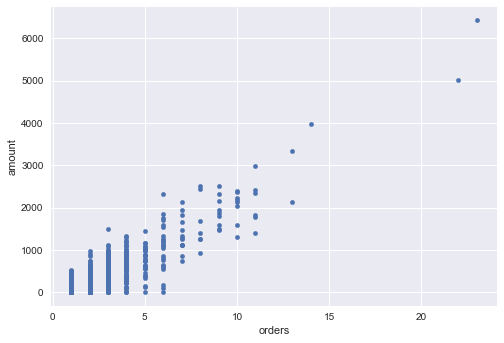

In [12]:
# 按客户分析：订单数 vs. 消费总额
df2 = df.groupby('ship_mobile')['total_amount'].agg({'orders':'count', 'amount':'sum'})
df2.plot.scatter(x='orders', y='amount')

plt.savefig('picture/orders_amount.png')

### 消费

In [13]:
# 总营业额
df.total_amount.sum()

596657.60499999998

In [14]:
# 统计
df.total_amount.describe()

count    5821.000000
mean      102.500877
std       106.008417
min         0.000000
25%        15.800000
50%        76.000000
75%       171.020000
max       532.930000
Name: total_amount, dtype: float64

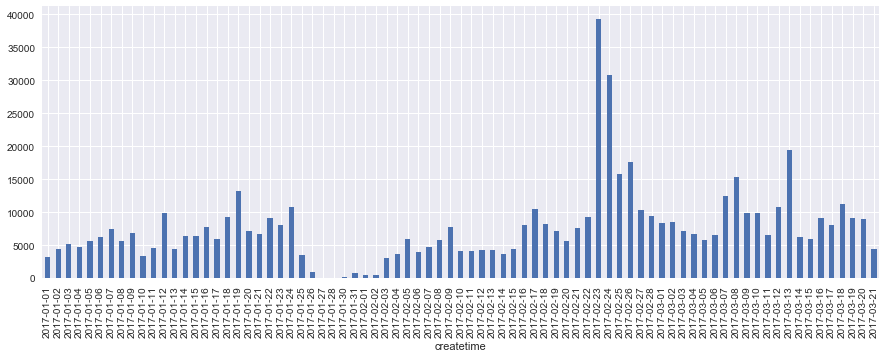

In [15]:
# 每日营业额
df.groupby('createtime')['total_amount'].sum().plot(kind='bar', figsize=(15,5))

plt.savefig('picture/daily_turnover.png')

In [16]:
# 消费 Top 10
df.groupby('ship_mobile')['total_amount'].sum().sort_values(ascending=False).head(10)

ship_mobile
17166769648    6420.86
16143545425    5002.66
16143452034    3969.50
17131246473    3332.54
16104542317    2983.37
17131310015    2519.62
16165985610    2504.15
16547276920    2441.16
17015859490    2406.81
15987152535    2393.70
Name: total_amount, dtype: float64

- 客户 17166769648 订单数23，总消费金额6420.86，绝对是VIP

In [17]:
# 常客分析
order_regular = (df.ship_mobile.value_counts() > 1)
num_regular = order_regular.sum()
print "regular ratio: %d / %d (%.2f%%)" % (num_regular, num_mobile, 100.0 * num_regular / num_mobile)

regular ratio: 1107 / 3778 (29.30%)


- 回头客比例太低

count    2671.000000
mean       64.273190
std        80.325428
min         0.000000
25%        10.000000
50%        26.000000
75%       109.000000
max       532.000000
Name: total_amount, dtype: float64


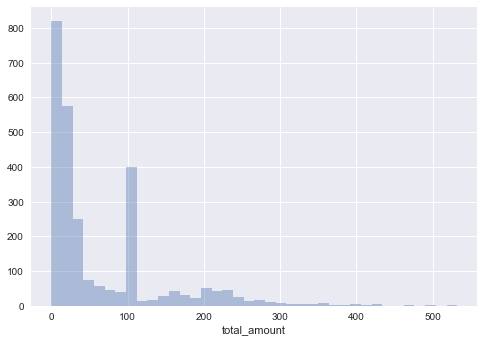

In [18]:
# 单次购买客户消费金额分布
order_once = (df.ship_mobile.value_counts() == 1)
df_order_once = df[order_once.reindex(df.ship_mobile).values]
print df_order_once.total_amount.describe()

sns.distplot(df_order_once.total_amount, kde=False)
plt.savefig('picture/order_once_amount_dist.png')

In [19]:
# 单次购买最常出现的结账金额
df_order_once.total_amount.value_counts().head()

109.0    351
0.0      202
20.0     137
18.0      77
10.0      66
Name: total_amount, dtype: int64

- 109.0 可能是某次促销活动

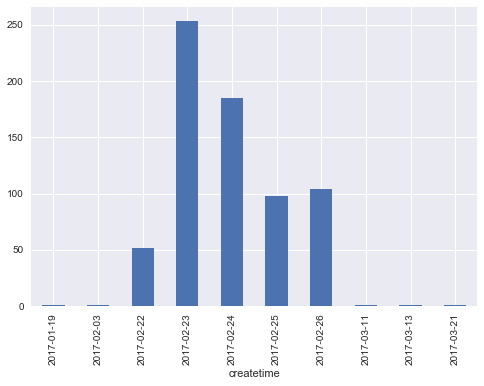

In [20]:
# 追踪消费金额109.0的客户
df_109 = df[df.total_amount == 109]

# 消费时间
df_109.groupby('createtime')['total_amount'].count().plot.bar()

plt.savefig('picture/amount109_orders_createtime.png')

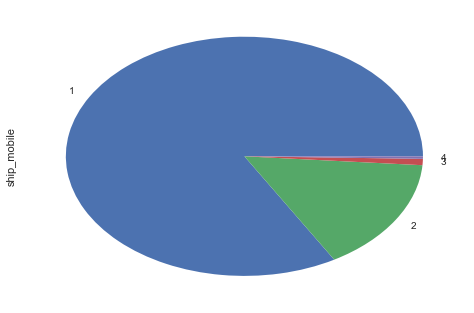

In [21]:
# 购买次数
df_109.ship_mobile.value_counts().value_counts().plot.pie()

plt.savefig('picture/amount109_orders_piechart.png')

- 貌似效果不佳 ="=

In [22]:
df.pay_status.value_counts()

1    4910
0     769
5     111
4      31
Name: pay_status, dtype: int64

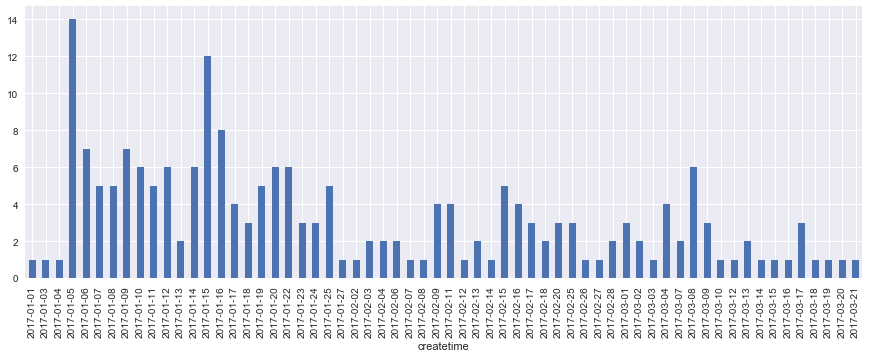

In [23]:
# 追踪消费金额0且只消费一次的客户
df_0 = df_order_once[df_order_once.total_amount == 0]

# 消费频次
df_0.groupby('createtime')['total_amount'].count().plot(kind='bar', figsize=(15,5))

plt.savefig('picture/order_once_amount0_barchar.png')

### 地区

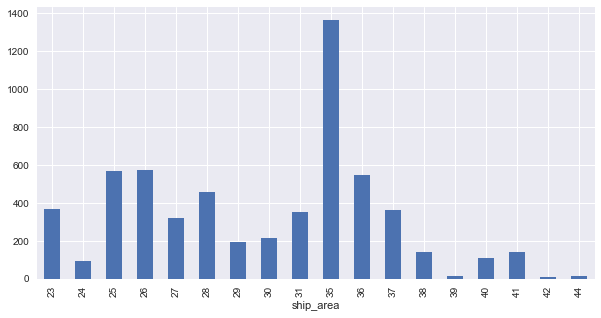

In [24]:
# 各地区消费次数
area_orders = df.groupby('ship_area')['total_amount'].count()

area_orders.plot(kind='bar', figsize=(10,5))
area_orders.sort_values(ascending=False).rename(areas).head()

plt.savefig('picture/ship_area_orders.png')

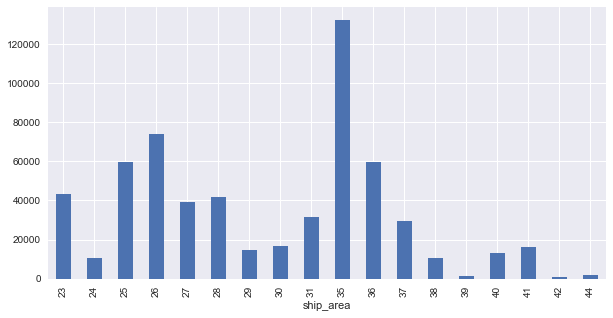

In [25]:
# 各地区消费总额
area_amount = df.groupby('ship_area')['total_amount'].sum()

area_amount.plot(kind='bar', figsize=(10,5))
area_amount.sort_values(ascending=False).rename(areas).head()

plt.savefig('picture/ship_area_amount.png')

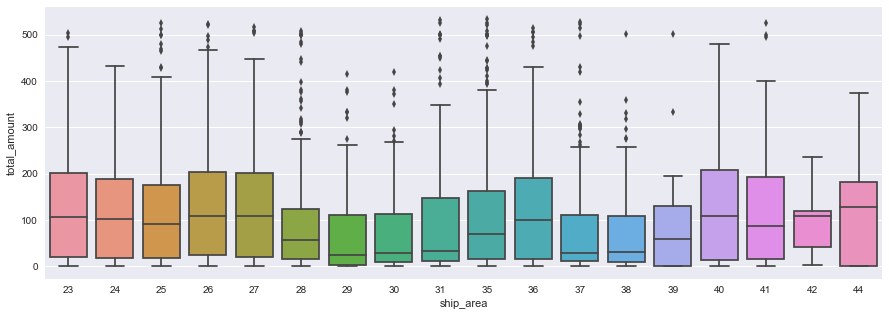

In [26]:
# 各地区消费力分析
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='ship_area', y='total_amount', data=df)

plt.savefig('picture/ship_ares_consumption_power.png')

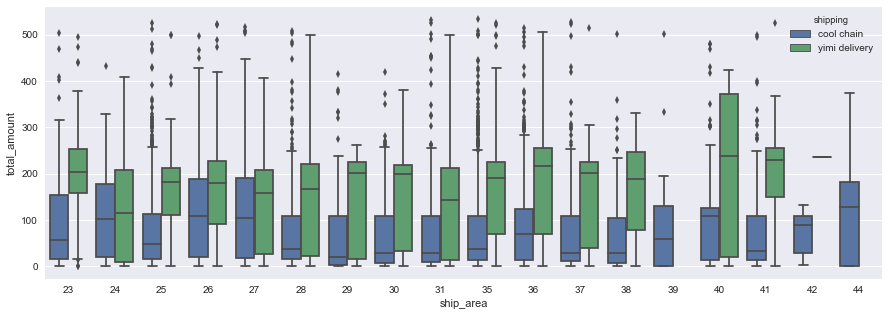

In [27]:
# 各地区消费力分析（区分运送方式）
fig = plt.figure(figsize=(15,5))
sns.boxplot(x="ship_area", y="total_amount", hue="shipping", data=df)

plt.savefig('picture/ship_ares_consumption_power_shipping.png')

### 时段

In [28]:
df.ship_time.value_counts()

morning|afternoon|evening    1680
afternoon|evening            1418
morning                      1295
afternoon                     853
evening                       575
Name: ship_time, dtype: int64

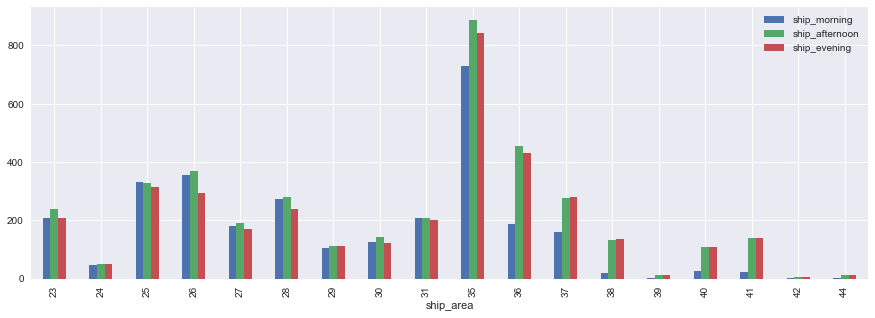

In [29]:
# 地区 vs. 时段
df.groupby('ship_area')[['ship_morning','ship_afternoon','ship_evening']].sum().plot.bar(figsize=(15,5))

plt.savefig('picture/ship_area_time.png')

- 不同地区不同收件时段
- 38（嘉定）、40（青浦）、41（松江）午后收件占大部分，可能大多为上班族

### 标识价格

In [30]:
# 假设送礼，不标识价格
df2 = df[df.delivery_note_price == 'none']

df2.groupby('ship_mobile')['total_amount'].count().value_counts()

1     193
2      32
3       7
6       2
5       2
19      1
14      1
9       1
4       1
Name: total_amount, dtype: int64